## NAME - ANUJ SINGLA
## COLLEGE - THAPAR INSTITTUTE OF ENGINEERING AND TECHNOLOGY

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [11]:
df=pd.read_csv(r"C:\Users\hp\Downloads\analysis.csv")
df=df.drop(['Timestamp'],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     140 non-null    object
 1   Age                        140 non-null    object
 2   City                       140 non-null    object
 3   Region                     140 non-null    object
 4   State                      140 non-null    object
 5   Choose a product category  140 non-null    object
dtypes: object(6)
memory usage: 6.7+ KB


# Preprocessing of data

In [6]:
# checking for null values

df.isnull().sum()

Gender                       0
Age                          0
City                         0
Region                       0
State                        0
Choose a product category    0
dtype: int64

In [ ]:
# so there is no null values in this dataset

In [12]:
# as we know that state and regions are highly correlated to each other, as states and regions are dependent on eachother so
# we have to drop one out of two columns.

# we will visualize and train our model w.r.t regions so will drop another columns i.e. states

df.drop(['State'],inplace=True,axis=1)

In [13]:
df

,Gender,Age,City,Region,Choose a product category
0,Male,21-25,Tier 3 City,Northern India,"Accessories(wallets, shoes, jackets etc.)"
1,Female,21-25,Tier 3 City,Northern India,"Personal care and grooming products(perfume, m..."
2,Female,15-20,Tier 2 City,Northern India,"Personal care and grooming products(perfume, m..."
3,Male,15-20,Tier 2 City,Northern India,"Accessories(wallets, shoes, jackets etc.)"
4,Male,15-20,Tier 2 City,Northern India,"Devices(earphones, smart watches, headphones e..."
...,...,...,...,...,...
135,Male,21-25,Tier 1 City,Southern India,Subscription of Streaming platforms(Amazon pri...
136,Male,21-25,Tier 3 City,Southern India,"Accessories(wallets, shoes, jackets etc.), Novels"
137,Male,15-20,Tier 3 City,Southern India,"Devices(earphones, smart watches, headphones e..."
138,Female,15-20,Tier 2 City,Southern India,"Accessories(wallets, shoes, jackets etc.), Dev..."


#### now this is the multilabel dataset as our target variable is "Choose a product category" so we have to make our dataset siutable for model training for multilabel dataset

In [14]:
d=pd.DataFrame(columns=['Accessories(wallets, shoes, jackets etc.)',
                        "Personal care and grooming products(perfume, makeup products etc.)",
                        "Devices(earphones, smart watches, headphones etc.)",
                        "Subscription of Streaming platforms(Amazon prime, Netflix etc.)","Novels"])

In [15]:
r,c=df.shape
for i in range(r):
    d.loc[i] = [0,0,0,0,0]

In [16]:
for i in range(r):
    d['Accessories(wallets, shoes, jackets etc.)'][i]=1 if "Accessories(wallets, shoes, jackets etc.)" in df['Choose a product category'][i] else 0
    d['Personal care and grooming products(perfume, makeup products etc.)'][i]=1 if "Personal care and grooming products(perfume, makeup products etc.)" in df['Choose a product category'][i] else 0
    d['Devices(earphones, smart watches, headphones etc.)'][i]=1 if "Devices(earphones, smart watches, headphones etc.)" in df['Choose a product category'][i] else 0
    d['Subscription of Streaming platforms(Amazon prime, Netflix etc.)'][i]=1 if "Subscription of Streaming platforms(Amazon prime, Netflix etc.)" in df['Choose a product category'][i] else 0
    d['Novels'][i]=1 if "Novels" in df['Choose a product category'][i] else 0

In [17]:
d.tail()

,"Accessories(wallets, shoes, jackets etc.)","Personal care and grooming products(perfume, makeup products etc.)","Devices(earphones, smart watches, headphones etc.)","Subscription of Streaming platforms(Amazon prime, Netflix etc.)",Novels
135,1,0,0,1,0
136,1,0,0,0,1
137,0,0,1,0,1
138,1,0,1,0,0
139,1,1,0,0,1


In [18]:
df.drop(['Choose a product category'],axis=1,inplace=True)

#### also we have to convert all categorical features to numerical features so that we can feed this data to train the model

In [19]:
final_df=pd.get_dummies(df)

In [20]:
# concatinating target variables with final data

data=[final_df,d]
final_df=pd.concat(data,axis=1)

In [21]:
final_df

,Gender_Female,Gender_Male,Age_15-20,Age_21-25,Age_26-30,City_Tier 1 City,City_Tier 2 City,City_Tier 3 City,Region_Eastern India,Region_Northern India,Region_Southern India,Region_Western India,"Accessories(wallets, shoes, jackets etc.)","Personal care and grooming products(perfume, makeup products etc.)","Devices(earphones, smart watches, headphones etc.)","Subscription of Streaming platforms(Amazon prime, Netflix etc.)",Novels
0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
136,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
137,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1
138,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0


#### Here we don't need any scaling because out data is already scaled between 0 and 1

#### also we have no outliers here in this dataset 

In [22]:
## here we have very few rows with age group 26-30 so will drop this as it has no effect on our dataset

final_df.drop(['Age_26-30'],axis=1,inplace=True)

In [23]:
final_df.shape

(140, 16)

#### Now we are ready with out dataset to train our model but before that we will visualize out data

# Visualization

In [40]:
data1=[df,d]
df=pd.concat(data1,axis=1)

In [60]:
df= df.loc[df["Age"] != "26-30"]
df

,Gender,Age,City,Region,"Accessories(wallets, shoes, jackets etc.)","Personal care and grooming products(perfume, makeup products etc.)","Devices(earphones, smart watches, headphones etc.)","Subscription of Streaming platforms(Amazon prime, Netflix etc.)",Novels
0,Male,21-25,Tier 3 City,Northern India,1,0,0,0,0
1,Female,21-25,Tier 3 City,Northern India,0,1,0,0,0
2,Female,15-20,Tier 2 City,Northern India,0,1,0,0,0
3,Male,15-20,Tier 2 City,Northern India,1,0,0,0,0
4,Male,15-20,Tier 2 City,Northern India,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
135,Male,21-25,Tier 1 City,Southern India,1,0,0,1,0
136,Male,21-25,Tier 3 City,Southern India,1,0,0,0,1
137,Male,15-20,Tier 3 City,Southern India,0,0,1,0,1
138,Female,15-20,Tier 2 City,Southern India,1,0,1,0,0


### visualizing count of every product categories with gender

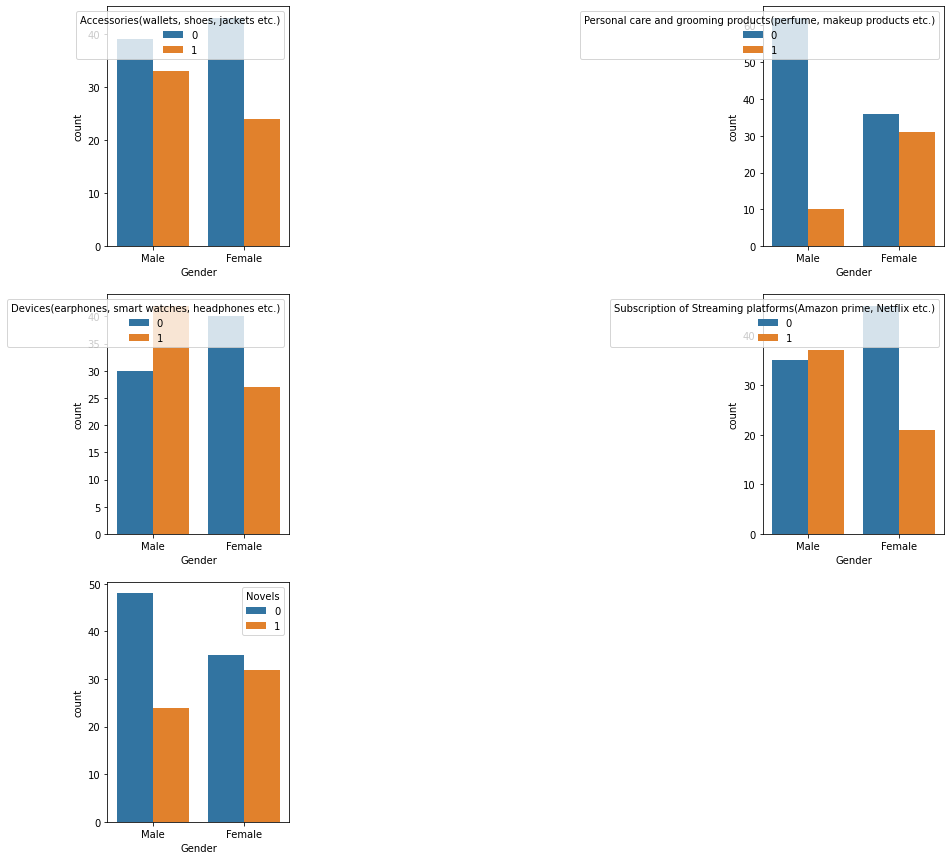

In [63]:
plt.figure(figsize=(15,15))

plt.subplot(3, 4, 1)
sns.countplot(x='Gender',hue='Accessories(wallets, shoes, jackets etc.)',data=df)

plt.subplot(3, 4, 4)
sns.countplot(x='Gender',hue='Personal care and grooming products(perfume, makeup products etc.)',data=df)

plt.subplot(3, 4, 5)
sns.countplot(x='Gender',hue='Devices(earphones, smart watches, headphones etc.)',data=df)

plt.subplot(3, 4, 8)
sns.countplot(x='Gender',hue='Subscription of Streaming platforms(Amazon prime, Netflix etc.)',data=df)

plt.subplot(3, 4, 9)
sns.countplot(x='Gender',hue='Novels',data=df)

plt.show()

#### CONCLUSION FROM THIS :-
1. MALE do not prefer Personal care and grooming products.
2. less number of FEMALE prefer Subscription of Streaming platforms.
3. less number of MALE prefer novels than FEMALE.
4. less number of FEMALE prefer Accessories(wallets, shoes, jackets etc.)(almost 1/3th).
5. MALE prefer Devices than FEMALE

### visualizing count of every product categories with city

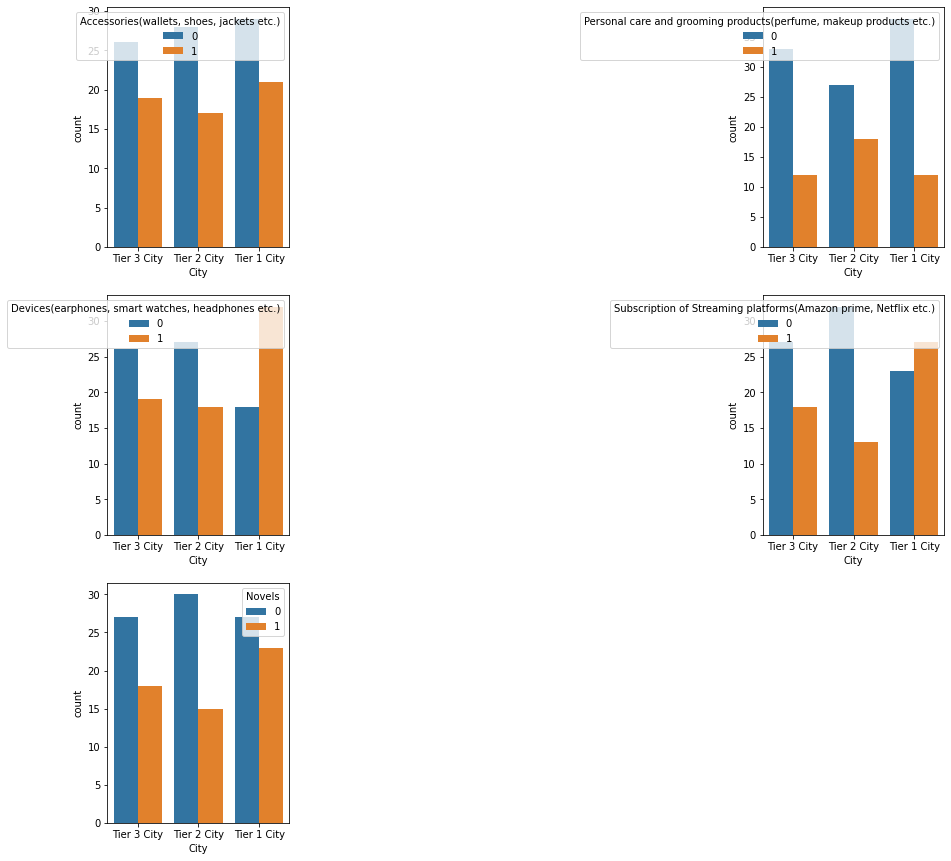

In [43]:
plt.figure(figsize=(15,15))

plt.subplot(3, 4, 1)
sns.countplot(x='City',hue='Accessories(wallets, shoes, jackets etc.)',data=df)

plt.subplot(3, 4, 4)
sns.countplot(x='City',hue='Personal care and grooming products(perfume, makeup products etc.)',data=df)

plt.subplot(3, 4, 5)
sns.countplot(x='City',hue='Devices(earphones, smart watches, headphones etc.)',data=df)

plt.subplot(3, 4, 8)
sns.countplot(x='City',hue='Subscription of Streaming platforms(Amazon prime, Netflix etc.)',data=df)

plt.subplot(3, 4, 9)
sns.countplot(x='City',hue='Novels',data=df)

plt.show()

#### CONCLUSION FROM THIS :-
1. very less number of person from tier-3 city and tier-2 prefer Personal care and grooming products
2. tier-1 city prefer mostly Devices and Subscription of Streaming platforms
3. tier-2 city do not prefer Subscription of Streaming platforms and novels
4. novels are also less prefered in tier -3 city

### visualizing count of every product categories with Region

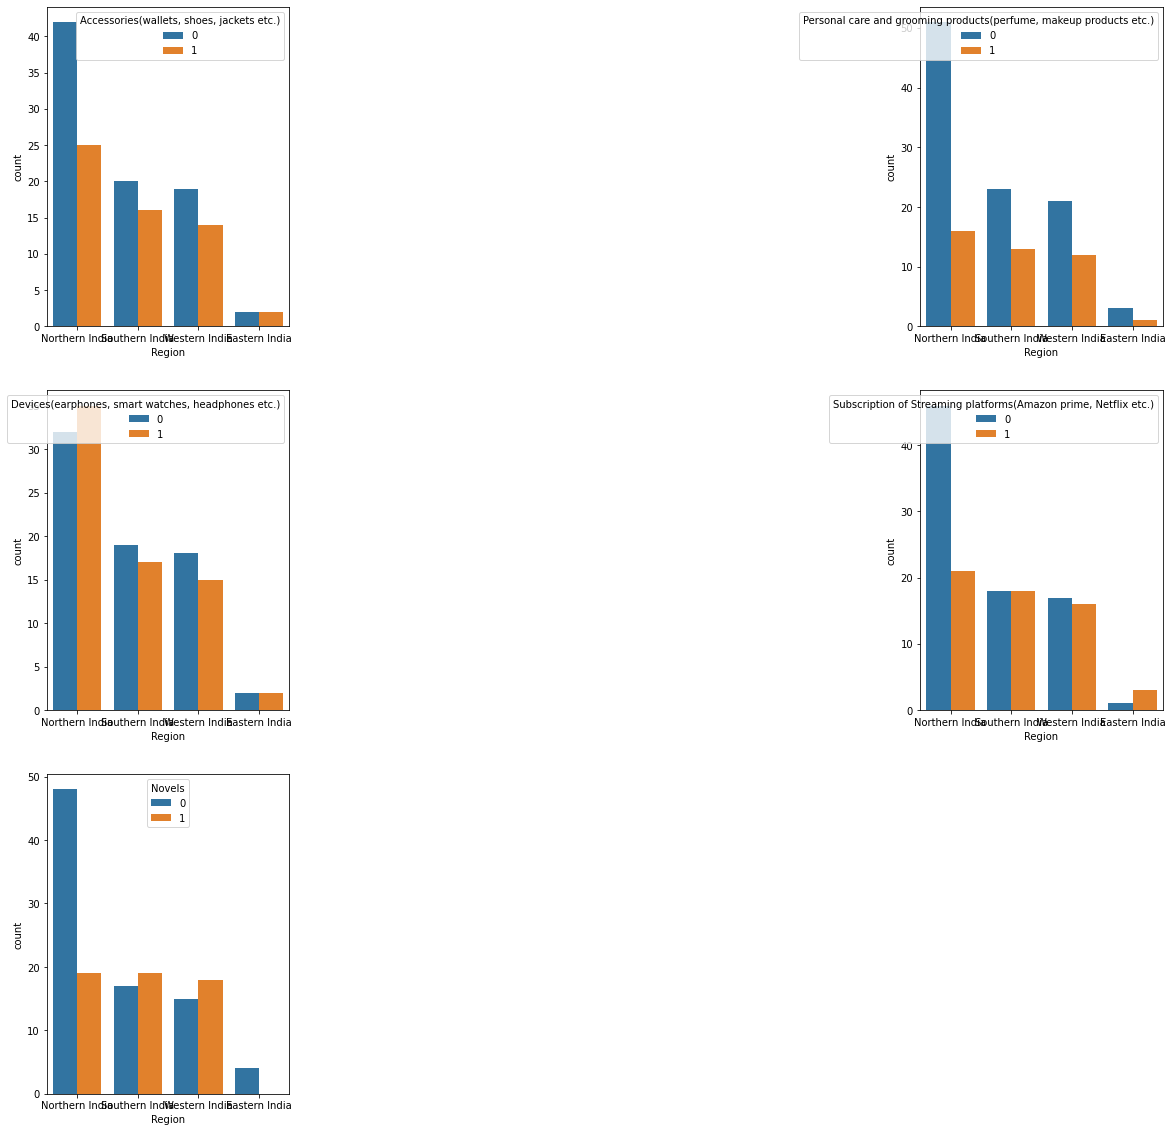

In [44]:
plt.figure(figsize=(20,20))

plt.subplot(3, 4, 1)
sns.countplot(x='Region',hue='Accessories(wallets, shoes, jackets etc.)',data=df)

plt.subplot(3, 4, 4)
sns.countplot(x='Region',hue='Personal care and grooming products(perfume, makeup products etc.)',data=df)

plt.subplot(3, 4, 5)
sns.countplot(x='Region',hue='Devices(earphones, smart watches, headphones etc.)',data=df)

plt.subplot(3, 4, 8)
sns.countplot(x='Region',hue='Subscription of Streaming platforms(Amazon prime, Netflix etc.)',data=df)

plt.subplot(3, 4, 9)
sns.countplot(x='Region',hue='Novels',data=df)

plt.show()

#### CONCLUSION FROM THIS :-

#### as we have very less data availabel of east india so will ignore this region

1. very less number of north indians preffer novels and  Personal care and grooming products.
2. north indians prefer Devices.
3. south indians and west indians prefer novels.
4. less number of soth indians and west indians prefer Personal care and grooming products.

### visualizing count of every product categories with Age

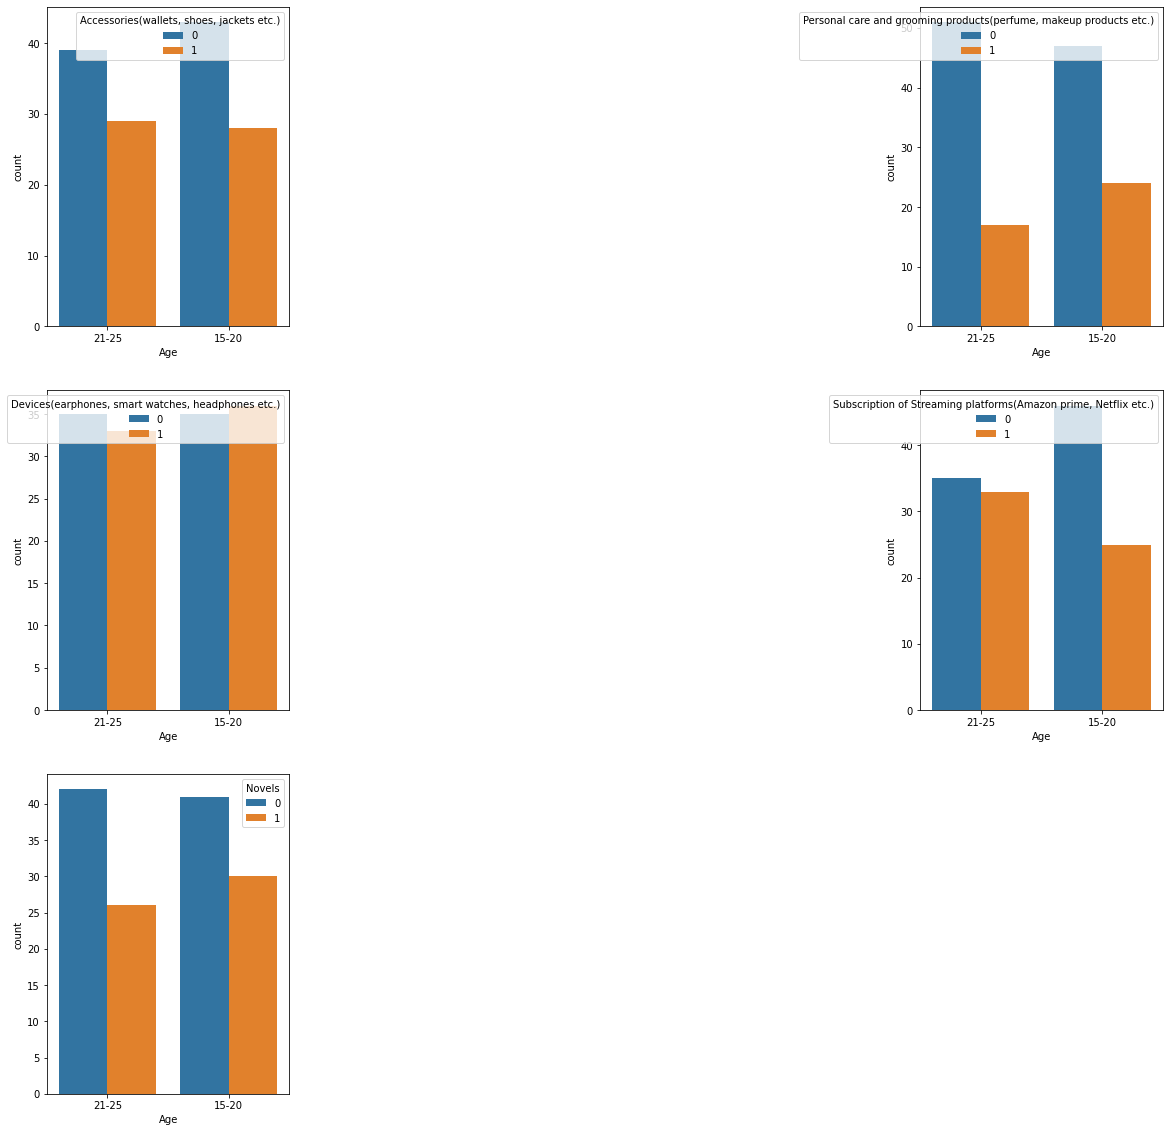

In [61]:
plt.figure(figsize=(20,20))

plt.subplot(3, 4, 1)
sns.countplot(x='Age',hue='Accessories(wallets, shoes, jackets etc.)',data=df)

plt.subplot(3, 4, 4)
sns.countplot(x='Age',hue='Personal care and grooming products(perfume, makeup products etc.)',data=df)

plt.subplot(3, 4, 5)
sns.countplot(x='Age',hue='Devices(earphones, smart watches, headphones etc.)',data=df)

plt.subplot(3, 4, 8)
sns.countplot(x='Age',hue='Subscription of Streaming platforms(Amazon prime, Netflix etc.)',data=df)

plt.subplot(3, 4, 9)
sns.countplot(x='Age',hue='Novels',data=df)

plt.show()

#### CONCLUSION FROM THIS :-

1.both age groups do not prefer Personal care and grooming products and novels much.   
2.age group 15-20 prefer subscription of streaming platform less than 21-25 age group.          
3.Devices are equally liked and unliked by both age groups

### Visualizing REGION with every feature we have in our dataset

#### region vs city

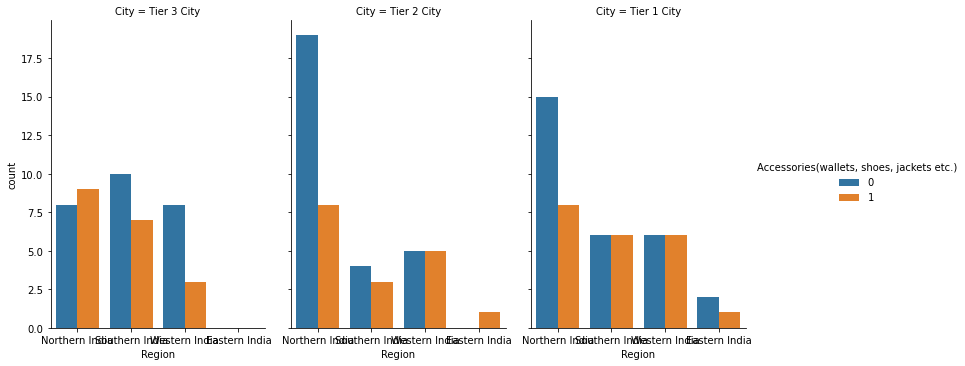

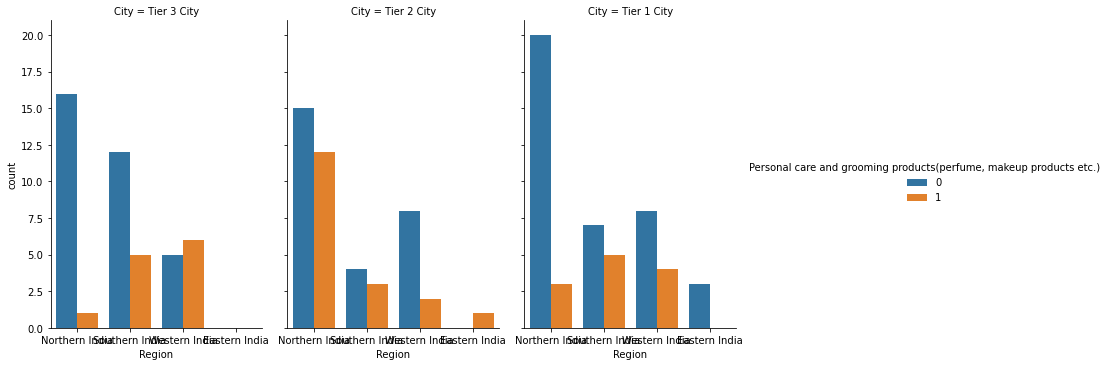

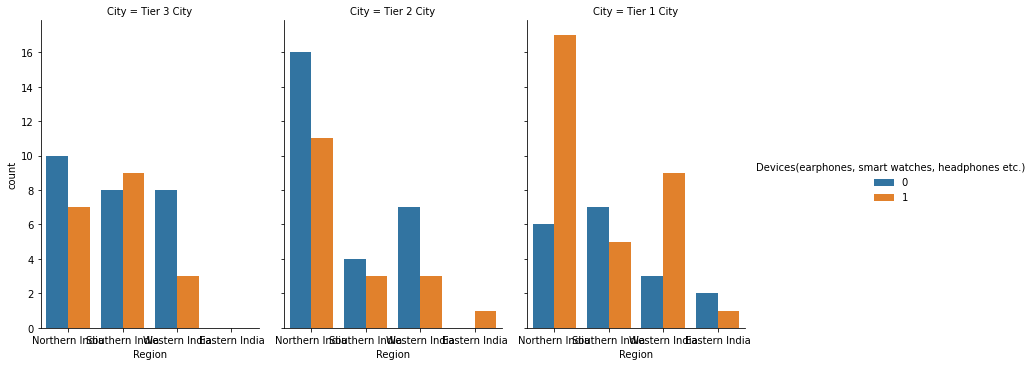

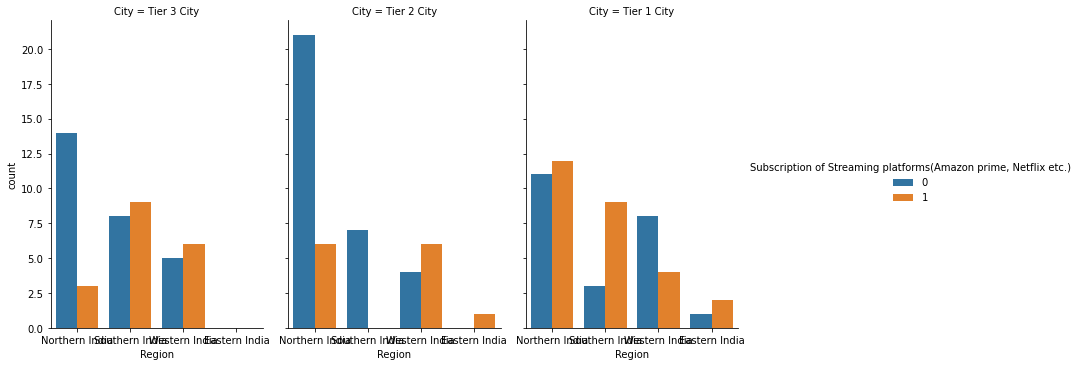

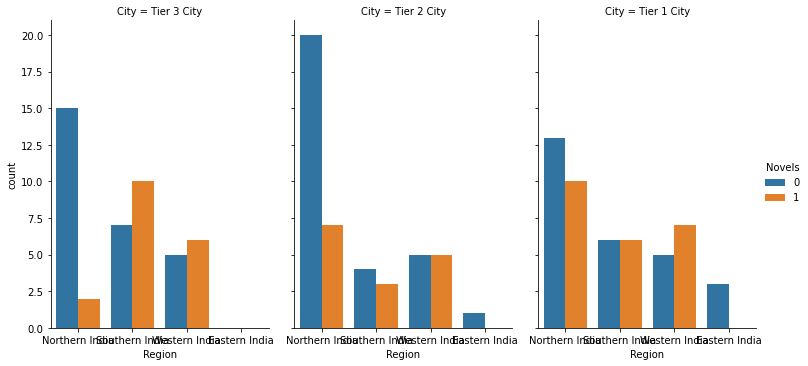

In [48]:
sns.catplot(x="Region", hue="Accessories(wallets, shoes, jackets etc.)", col="City",
                data=df, kind="count",
                height=5, aspect=.7);
sns.catplot(x="Region", hue="Personal care and grooming products(perfume, makeup products etc.)", col="City",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Devices(earphones, smart watches, headphones etc.)", col="City",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Subscription of Streaming platforms(Amazon prime, Netflix etc.)", col="City",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Novels", col="City",
                data=df, kind="count",
                height=5, aspect=.7);

#### CONCLUSION FROM THIS :-

ACCESSORIES---
1. TIER-2 + NORTH INDIANS and TIER-1 + NORTH INIDANS do not prefer this.
2. TIER-3 + WEST INDIANS also do not prefer this.
3. TIER-3 + NORTH INDIANS prefer this.
4. and all other combinations are equally likely to prefer and not prefer this.

Personal care and grooming products---
1. TIER-3 + NORTH and TIER-1 + NORTH INDIANS do not prefer Personal care and grooming products
2. WEST INDIANS + TIER-3 prefers this but TIER-2 + WEST INDIANS do not prefer.

Devices---
1. TIER-3 + SOUTH , TIER-1 + NORTH , TIER-1 + WEST prefers this.
2. TIER-2 + WEST , TIER3 + WEST do not prefer.
3. and all other combinations are equally likely to prefer and not prefer this.

Subscription of Streaming platforms---
1. TIER-3 + NORTH , TIER-2 + NORTH , TIER-2 + SOUTH do not prefer this.
2. TIER-3 + SOUTH , TIER-3 + WEST , TIER-2 + WEST , TIER-1 + NORTH , TIER-1 + SOUTH prefer this.

Novels---
1. TIER-3 + NORTH , TIER-2 + NORTH do not prefer this.
2. TIER-3 + SOUTH , TIER-3 + WEST , TIER-1 + WEST prefer this.
3. else are equally likely

#### region vs gender

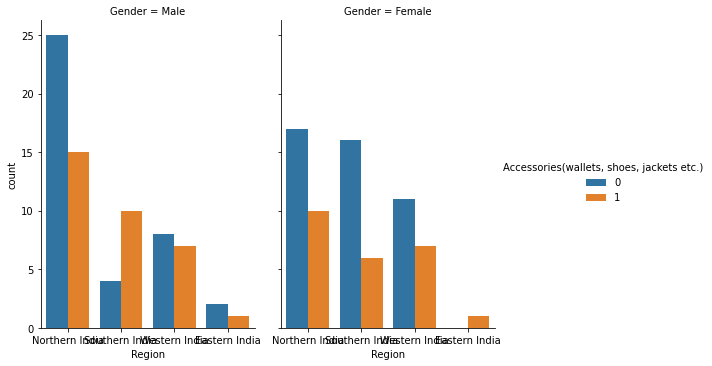

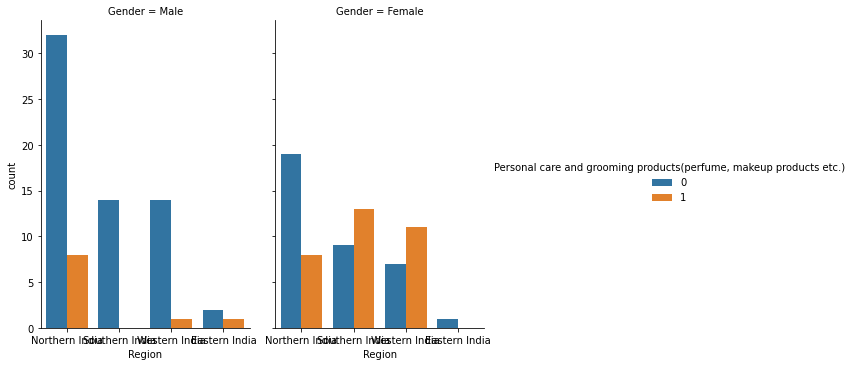

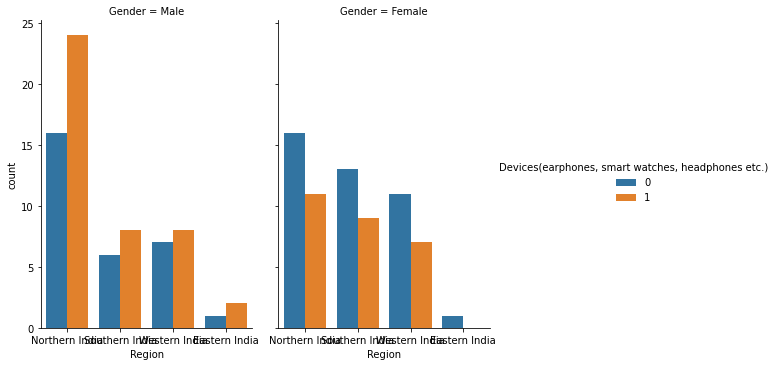

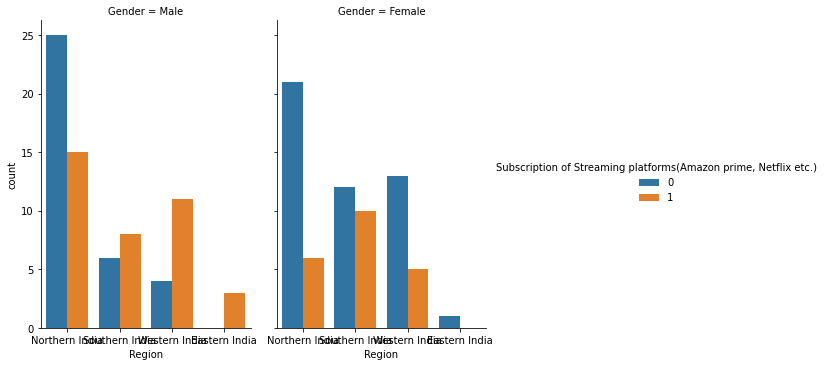

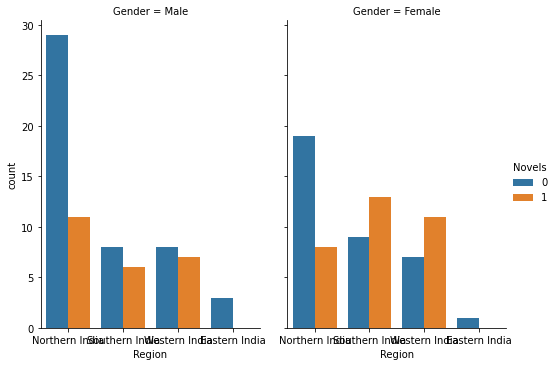

In [52]:
sns.catplot(x="Region", hue="Accessories(wallets, shoes, jackets etc.)", col="Gender",
                data=df, kind="count",
                height=5, aspect=.7);
sns.catplot(x="Region", hue="Personal care and grooming products(perfume, makeup products etc.)", col="Gender",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Devices(earphones, smart watches, headphones etc.)", col="Gender",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Subscription of Streaming platforms(Amazon prime, Netflix etc.)", col="Gender",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Novels", col="Gender",
                data=df, kind="count",
                height=5, aspect=.7);

#### CONCLUSION FROM THIS :-

ACCESSORIES---
1. MALE OF SOUTH prefer this.

Personal care and grooming products---
1. MALE do not prefer this.
2. FEMALE OF SOUTH AND WEST prefer this while FEMALE OF NORTH do not prefer.

Devices---
1. MALE OF ALL REGION prefer this.
2. FEMALE are less likelyto prefer.

Subscription of Streaming platforms---
1. except MALE of NORTH every MALE prefer this.
2. FEMALE OF NORTH AND WEST do not prefer.

Novels---
1. FEMALE OF SOUTH AND WEST prefer this.
2. NORTH INDIANS do not prefer this.

 #### region vs age

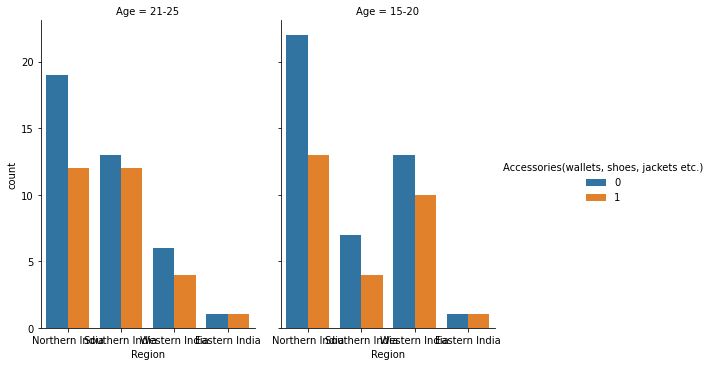

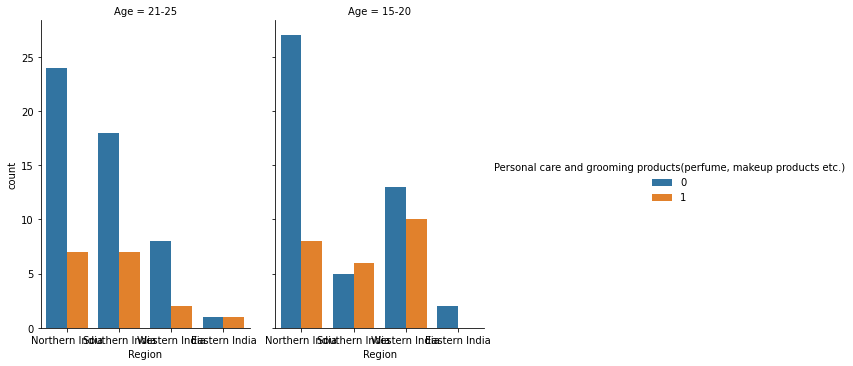

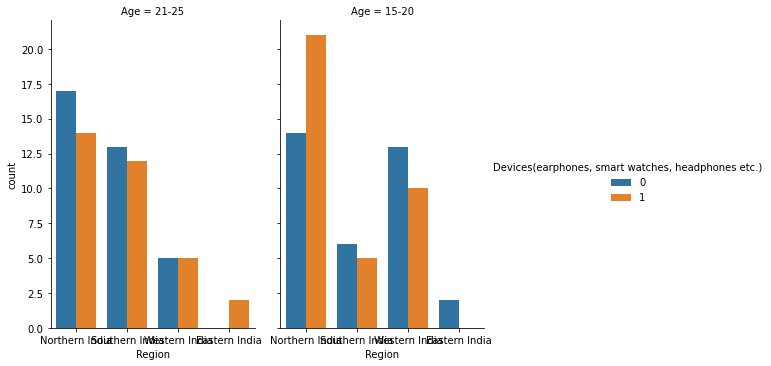

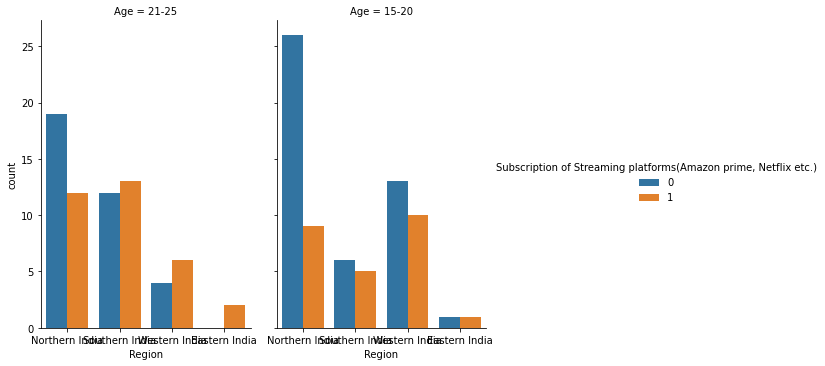

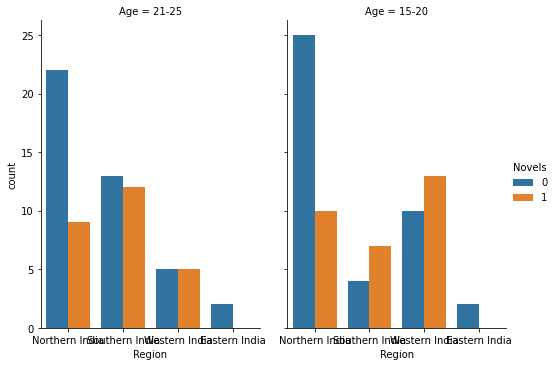

In [64]:
sns.catplot(x="Region", hue="Accessories(wallets, shoes, jackets etc.)", col="Age",
                data=df, kind="count",
                height=5, aspect=.7);
sns.catplot(x="Region", hue="Personal care and grooming products(perfume, makeup products etc.)", col="Age",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Devices(earphones, smart watches, headphones etc.)", col="Age",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Subscription of Streaming platforms(Amazon prime, Netflix etc.)", col="Age",
                data=df, kind="count",
                height=5, aspect=.7);

sns.catplot(x="Region", hue="Novels", col="Age",
                data=df, kind="count",
                height=5, aspect=.7);

#### CONCLUSION FROM THIS :-

ACCESSORIES---                                                          
1.NORTH INDIANS do not prefer.                           

Personal care and grooming products---                                                        
1.NORTH INDIANS do not prefer.                                                            
2.AGE GROUP 21-25 do not prefer this.                                       

Devices---                                                                        
1.NORTH INDIANS WITH AGE GROUP 15-20 prefer this.                                                 
2.else are equally likely.                                                              

Subscription of Streaming platforms---                                                
1.age group between 21-25 mostly prefer this except north indians.                                               

Novels---                                                                      
1.NORTH INDIANS do not prefer.                                                      
2.AGE GROUP 15-20 prefer this except north indians.                              


## Final conclusion based on the visualization:-

#### NORTH INDIANS-
1. North indians like devices product category. Mostly belongs to TIER-1 city and of age 21-25 years old.  
2. North inidans with TIER-3 city prefers Accessories.
3. North inidans with TIER-1 city prefers subscriptions of streaming platform.

#### SOUTH INDIANS-
1. South indians mostly prefer every product category like FEMALE prefer grooming products and novels , MALE prefer other products except these.
2. But strongly we can say south indians with TIER-2 city do not prefer subscription of streaming platforms.

#### WEST INDIANS-
1. Females of west india with TIER-1 and TIER-3 city prefer novels. 
2. only TIER-1 city west indian male prefer devices. 
3. FEMALE of west india do not prefer subscription but MALE do.
4. TIER-3 city do not prefer accessories.

## Checking correlation between features

In [66]:
df=pd.read_csv(r"C:\Users\hp\Downloads\analysis.csv")
df=df.drop(['Timestamp','State','Choose a product category'],axis=1)
# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Age']=le.fit_transform(df['Age'])
df['City']=le.fit_transform(df['City'])
df['Region']=le.fit_transform(df['Region'])

In [68]:
df.corr()

,Gender,Age,City,Region
Gender,1.000000,0.194599,-0.094270,-0.156319
Age,0.194599,1.000000,0.042207,-0.097004
City,-0.094270,0.042207,1.000000,0.095942
Region,-0.156319,-0.097004,0.095942,1.000000


#### Here we can say every feature is independent of eachother so we can proceed further with this.

In [70]:
final_df

,Gender_Female,Gender_Male,Age_15-20,Age_21-25,City_Tier 1 City,City_Tier 2 City,City_Tier 3 City,Region_Eastern India,Region_Northern India,Region_Southern India,Region_Western India,"Accessories(wallets, shoes, jackets etc.)","Personal care and grooming products(perfume, makeup products etc.)","Devices(earphones, smart watches, headphones etc.)","Subscription of Streaming platforms(Amazon prime, Netflix etc.)",Novels
0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
3,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
136,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
137,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1
138,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0


In [215]:
X=final_df.iloc[:,0:11]
y=final_df.iloc[:,11:16]

print(X.shape)
print(y.shape)


(140, 11)
(140, 5)


In [216]:
# splitting data to test and train 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 11)
(28, 11)
(112, 5)
(28, 5)


# Model Building & Evaluation

In [126]:
from scipy import sparse
y=y_train.astype(float)
y_train = sparse.csr_matrix(y)

y=y_test.astype(float)
y_test=sparse.csr_matrix(y)

### This is multilabel problem so will try using different methods:
1. Binary Relevance
2. Classifier Chains
3. Adapted Algorithm (KNN)

In [129]:
# using binary relevance

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.03571428571428571

In [131]:
# using classifier chains

from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.03571428571428571

In [144]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=100)

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

C:\Users\hp\anaconda3\envs\tensorflow_keras\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.21428571428571427

### Tried with svm

In [299]:
from sklearn import svm

s1=svm.SVC()
s1.fit(X_train,y_train.iloc[:,0].astype('int'))

s2=svm.SVC()
s2.fit(X_train, y_train.iloc[:,1].astype('int'))

s3=svm.SVC()
s3.fit(X_train, y_train.iloc[:,2].astype('int'))

s4=svm.SVC()
s4.fit(X_train, y_train.iloc[:,3].astype('int'))

s5=svm.SVC()
s5.fit(X_train, y_train.iloc[:,4].astype('int'))

SVC()

In [300]:
l1=[]
fi=[]
for index, row in X_test.iterrows():
    row=np.asarray(row)
    row=row.reshape(1,-1)
    p0=m1.predict(row)
    p1=m2.predict(row)
    p2=m3.predict(row)
    p3=m4.predict(row)
    p4=m5.predict(row)
    l1=[p0,p1,p2,p3,p4]
    fi.append(l1)

In [301]:
from scipy import sparse
y_test=np.asarray(y_test)
y=y_test.astype(float)
y_ = sparse.csr_matrix(y)
fi=np.asarray(fi)
y=fi.astype(float)
y=y.reshape(28,5)
y_fi=sparse.csr_matrix(y)

In [302]:
accuracy_score(y_,y_fi)

0.07142857142857142

## Now will try using one vs rest methoad and using jaccard score for evaluating

In [293]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.multiclass import OneVsRestClassifier

In [291]:
sgd=SGDClassifier()
lr=LogisticRegression(solver="lbfgs")
svc=LinearSVC()
mnb = MultinomialNB()
rf=RandomForestClassifier()

In [254]:
def j_score(y_true,y_pred):
    jaccard=np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
    return jaccard.mean()*100

def print_score(y_pred,clf):
    print("clf: ",clf.__class__.__name__)
    print("jaccard_score: {}".format(j_score(y_test,y_pred)))
    print("---")

In [294]:
for classifier in [sgd,lr,svc,mnb,rf]:
    clf=OneVsRestClassifier(classifier)
    clf.fit(X_train,y_train1)
    y_pred=clf.predict(X_test)
    print_score(y_pred,classifier)

clf:  SGDClassifier
jaccard_score: 30.119047619047617
---
clf:  LogisticRegression
jaccard_score: 37.38095238095238
---
clf:  LinearSVC
jaccard_score: 40.952380952380956
---
clf:  MultinomialNB
jaccard_score: 30.773809523809526
---
clf:  RandomForestClassifier
jaccard_score: 27.023809523809522
---


#### out of these best jaccard score is given by LinearSVC i.e. 40.9